<a href="https://colab.research.google.com/github/abhinavbhandar/supplychain/blob/main/Sales_Forecast_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 57.3 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np

#Read Data

In [4]:
df=pd.read_csv('/content/month sale.csv',index_col='Date',parse_dates=True)
df=df.dropna()
print('Shape of data',df.shape)
df.head()

Shape of data (36, 1)


,Sum of Sales
Date,
2015-01-01,1051590.06
2015-02-01,927009.88
2015-03-01,1051253.67
2015-04-01,1014463.26
2015-05-01,1050478.42


In [5]:
df.columns=["Sales"]
df.head()

,Sales
Date,
2015-01-01,1051590.06
2015-02-01,927009.88
2015-03-01,1051253.67
2015-04-01,1014463.26
2015-05-01,1050478.42


#Plot Your Data

<Axes: xlabel='Date'>

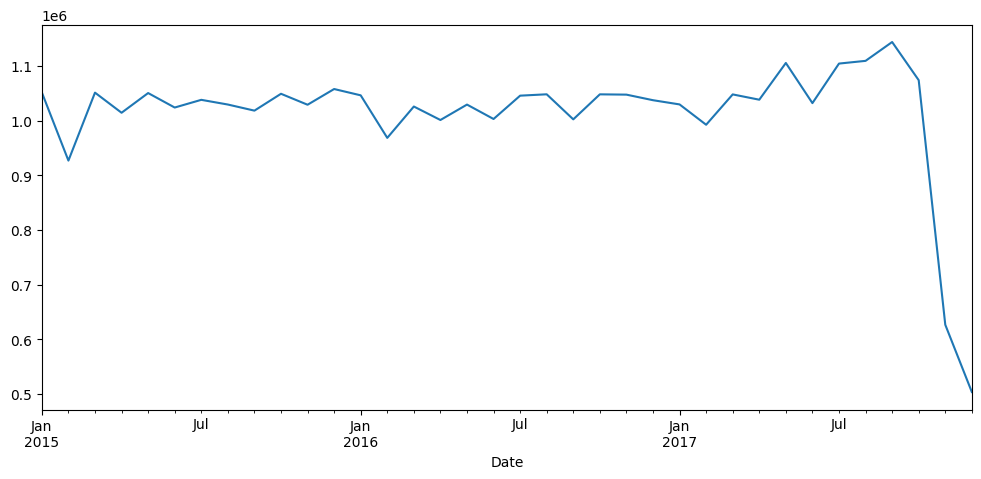

In [6]:
df['Sales'].plot(figsize=(12,5))

#Check For Stationarity

In [7]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)

In [8]:
adf_test(df['Sales'])

1. ADF :  -3.7796546435661558
2. P-Value :  0.0031224702327139835
3. Num Of Lags :  5
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 30
5. Critical Values :
	 1% :  -3.6699197407407405
	 5% :  -2.9640707407407407
	 10% :  -2.621171111111111


#Figure Out Order for ARIMA Model

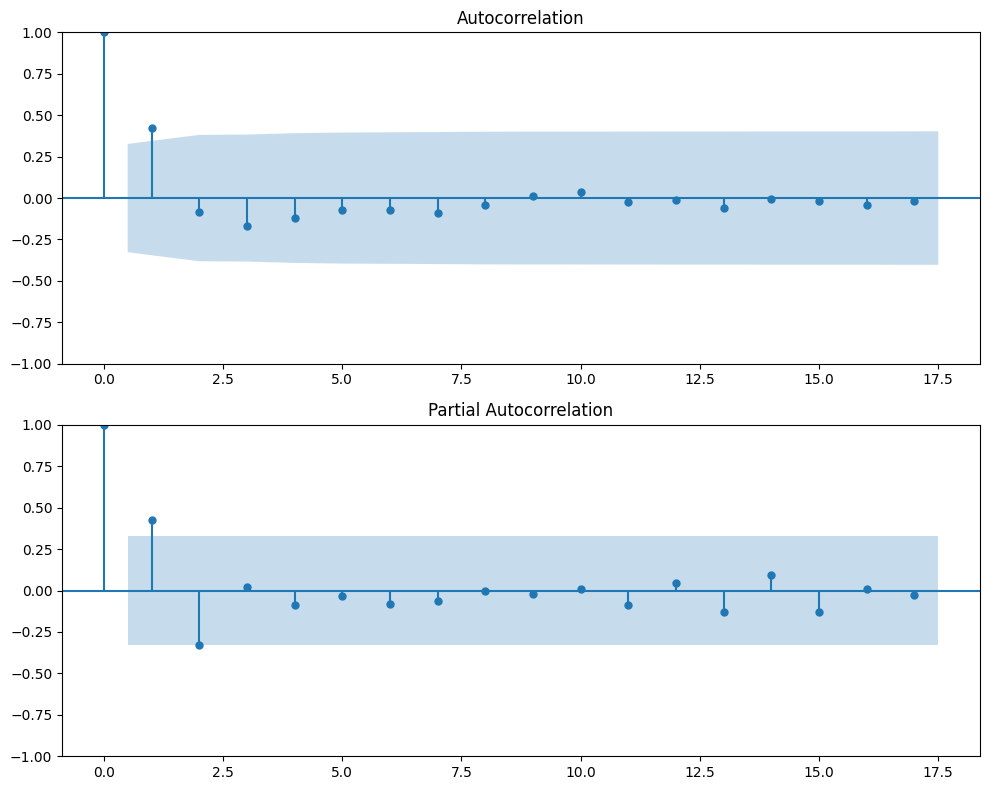

In [24]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Plot ACF
plot_acf(df['Sales'], lags=17, ax=axes[0])

# Plot PACF
plot_pacf(df['Sales'], lags=17, ax=axes[1])


plt.tight_layout()
plt.show()

In [9]:
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [10]:
stepwise_fit = auto_arima(df['Sales'],trace=True,
                          suppress_warnings=True)

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=945.731, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=932.018, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=932.160, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1100.250, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=927.826, Time=0.08 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=941.687, Time=0.22 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=947.670, Time=0.16 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=931.099, Time=0.04 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=933.291, Time=0.26 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.04 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 1.208 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   36
Model:               SARIMAX(2, 0, 0)   Log Likelihood                -459.913
Date:                Sun, 22 Dec 2024   AIC                            927.826
Time:                        06:46:19   BIC                            934.161
Sample:                    01-01-2015   HQIC                           930.037
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   8.279e+05   2.71e+05      3.057      0.002    2.97e+05    1.36e+06
ar.L1          0.9027      0.135      6.700      0.000       0.639       1.167
ar.L2         -0.7131      0.249     -2.865      0.004      -1.201      -0.225
sigma2      7.168e+09     45.429   1.58e+08      0.000    7.17e+09    7.17e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.27   Jarque-Bera (JB):                89.51
Prob(Q):                              0.60   Prob(JB):                         0.00
Heteroskedasticity (H):               4.16   Skew:                            -1.90
Prob(H) (two-sided):                  0.02   Kurtosis:                         9.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.61e+23. Standard errors may be unstable.
"""

#Split Data into Training and Testing

In [11]:
from statsmodels.tsa.arima_model import ARIMA

In [12]:
print(df.shape)
train=df.iloc[:-5]
test=df.iloc[-5:]
print(train.shape,test.shape)
print(test.iloc[0],test.iloc[-1])

(36, 1)
(31, 1) (5, 1)
Sales    1109337.15
Name: 2017-08-01 00:00:00, dtype: float64 Sales    503910.81
Name: 2017-12-01 00:00:00, dtype: float64


## Train the Model

In [25]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train['Sales'],order=(2,0,2))
model=model.fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   31
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -362.502
Date:                Sun, 22 Dec 2024   AIC                            737.004
Time:                        07:01:44   BIC                            745.608
Sample:                    01-01-2015   HQIC                           739.809
                         - 07-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.032e+06   9248.121    111.601      0.000    1.01e+06    1.05e+06
ar.L1         -1.6072      0.433     -3.709      0.000      -2.457      -0.758
ar.L2         -0.8307      0.356     -2.332      0.020      -1.529      -0.133
ma.L1          1.5820      0.379      4.175      0.000       0.839       2.325
ma.L2          0.9770      0.374      2.613      0.009       0.244       1.710
sigma2      8.141e+08      0.011   7.68e+10      0.000    8.14e+08    8.14e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.45   Jarque-Bera (JB):                 9.33
Prob(Q):                              0.50   Prob(JB):                         0.01
Heteroskedasticity (H):               1.12   Skew:                            -0.88
Prob(H) (two-sided):                  0.86   Kurtosis:                         5.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.16e+27. Standard errors may be unstable.
"""

#Make Predictions on Data Set

<Axes: xlabel='Date'>

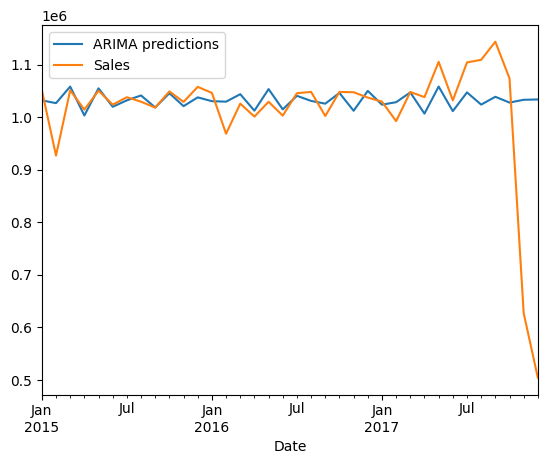

In [44]:
start=0
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA predictions')
pred.plot(legend=True)
df['Sales'].plot(legend=True)


In [45]:
mean_sales = df['Sales'].mean()
print(mean_sales)

1012585.6722222221


In [46]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,df['Sales']))
print(rmse)


117039.17730240173


In [47]:
accuracy = (1 - (rmse / mean_sales)) * 100
print(accuracy)

88.44155309391773


In [34]:
model2=ARIMA(df['Sales'],order=(2,0,2))
model2=model2.fit()
df.tail()

,Sales
Date,
2017-08-01,1109337.15
2017-09-01,1143775.09
2017-10-01,1073994.16
2017-11-01,626914.37
2017-12-01,503910.81


#For Future Dates

In [35]:
index_future_dates=pd.date_range(start='2017-12-01', periods=13, freq='MS')
#print(index_future_dates)
pred=model2.predict(start=len(df),end=len(df)+12,typ='levels').rename('ARIMA Predictions')
#print(comp_pred)
pred.index=index_future_dates
print(pred)

2017-12-01    596934.56
2018-01-01    965377.70
2018-02-01   1280316.52
2018-03-01   1289019.01
2018-04-01   1061775.07
2018-05-01    850558.01
2018-06-01    829899.95
2018-07-01    968950.89
2018-08-01   1109640.15
2018-09-01   1132591.68
2018-10-01   1048251.90
2018-11-01    955139.26
2018-12-01    934210.13
Freq: MS, Name: ARIMA Predictions, dtype: float64


In [36]:
# Suppress scientific notation for pandas
pd.options.display.float_format = '{:.2f}'.format
print(pred)


2017-12-01    596934.56
2018-01-01    965377.70
2018-02-01   1280316.52
2018-03-01   1289019.01
2018-04-01   1061775.07
2018-05-01    850558.01
2018-06-01    829899.95
2018-07-01    968950.89
2018-08-01   1109640.15
2018-09-01   1132591.68
2018-10-01   1048251.90
2018-11-01    955139.26
2018-12-01    934210.13
Freq: MS, Name: ARIMA Predictions, dtype: float64


<Axes: >

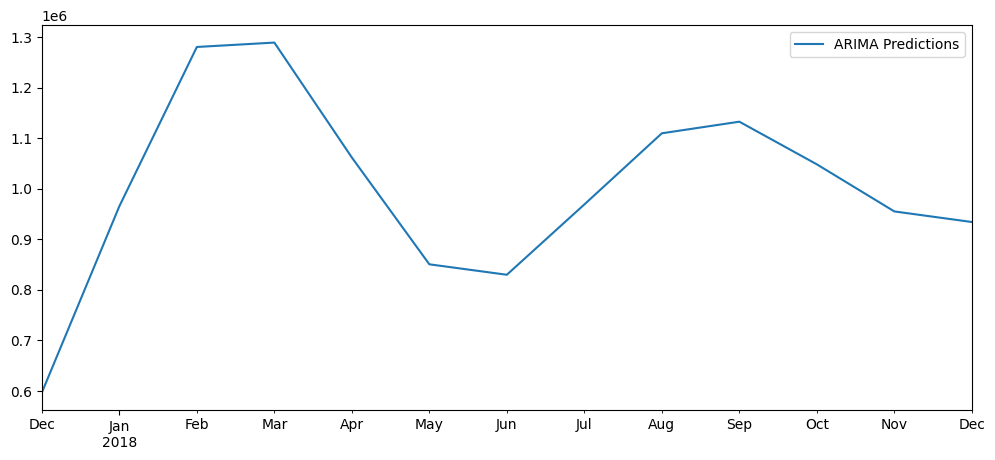

In [37]:
pred.plot(figsize=(12,5),legend=True)